## MNIST Handwritten Digit Classification using Deep Learning (Neural Network)

importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


loading MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# printing 30th image
print(X_train[30])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 253 253 25

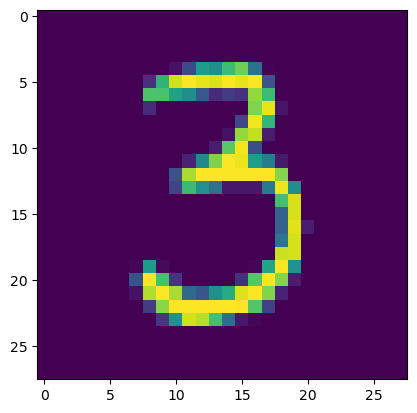

In [7]:
# displaying the image

plt.imshow(X_train[50])
plt.show()


In [8]:
print(Y_train[50])

3


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


all the images have the same dimentions, otherwise we have to resize all the images to common dimension

In [10]:
# scaling the values

X_train = X_train / 255
X_test = X_test / 255

Building the Neural Network

In [11]:
# setting up the layers of neural network

model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(50, activation='relu'),
                           keras.layers.Dense(50, activation='relu'),
                           keras.layers.Dense(10, activation='sigmoid'),
])

In [12]:
# compiling the neural network

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [13]:
# training the neural network 

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2897 - accuracy: 0.9164
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1345 - accuracy: 0.9601
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 0.9696
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0817 - accuracy: 0.9750
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9788
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0604 - accuracy: 0.9813
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9836
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0450 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

**Accuracy on test data :**

In [14]:
accuracy, loss = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9716


In [15]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
print(Y_pred[0])

[8.3438332e-05 5.1511055e-08 3.5340901e-02 9.7765654e-01 3.7366536e-07
 4.3144195e-05 1.3404824e-08 1.0000000e+00 1.4419794e-06 1.9356851e-02]


model.predict() gives the prediction of probability of each class for that data point

In [17]:
# converting prediction probability to class label

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

confusion matrix

In [18]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 968    0    2    1    0    2    4    1    2    0]
 [   0 1116    1    3    0    1    7    2    4    1]
 [   4    1 1009    2    2    0    6    6    2    0]
 [   0    0    4  984    0    6    1    8    2    5]
 [   0    1    2    1  965    0    7    1    0    5]
 [   2    0    0   17    3  858    4    1    5    2]
 [   7    1    0    0    6    8  933    0    3    0]
 [   0    1    7    1    3    0    1 1004    2    9]
 [   5    1    8    9    7    9    4    7  922    2]
 [   3    2    0    9   57    7    0   10    2  919]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

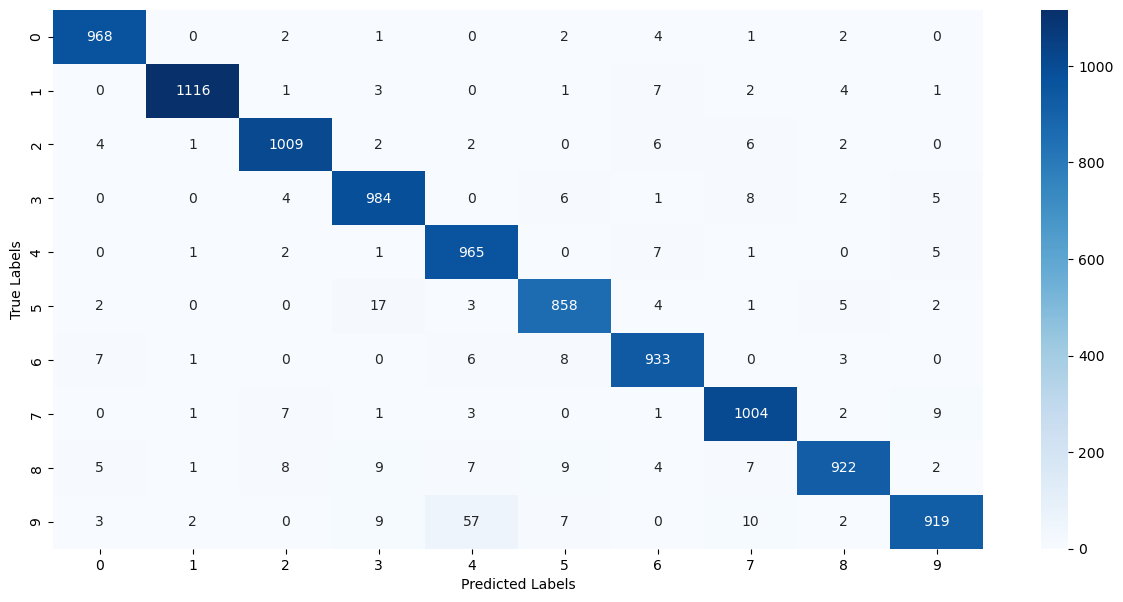

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a predictive system**

In [ ]:
input_image_path = input('The path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

input_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as', input_pred_label)
